<a href="https://colab.research.google.com/github/akutayaydin/Magnimind-6-Image-Processing/blob/main/TNT_Project_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image
from skimage import io, filters
import scipy.ndimage as ndi
import sys
import keras.utils as image
from tensorflow.keras.utils import load_img
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
mypath='/content/gdrive/My Drive/Google Colab Folder/TNT_Project'
print(os.listdir(mypath))

['m05-label.png', 'm05.png', 'temp', 'output_image_dilated.png', 'output_image_rolling_ball_50.png', 'output_image_gaussian.png']


In [4]:
unlabeled_image = cv2.imread('/content/gdrive/My Drive/Google Colab Folder/TNT_Project/m05.png')

In [5]:
unlabeled_image.dtype

dtype('uint8')

In [6]:
hist = ndi.histogram(unlabeled_image,min =0 , max =255, bins =256)
hist.shape

(256,)

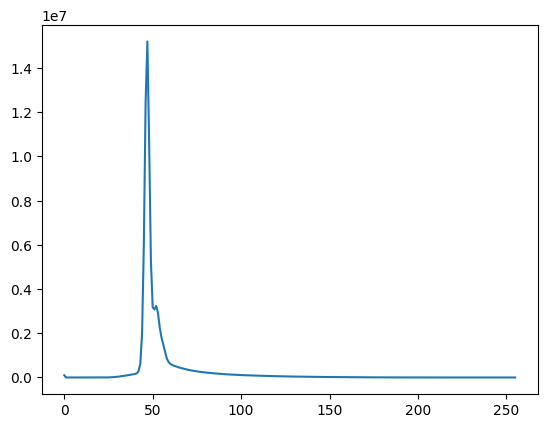

In [7]:
plt.plot(hist)
plt.show()

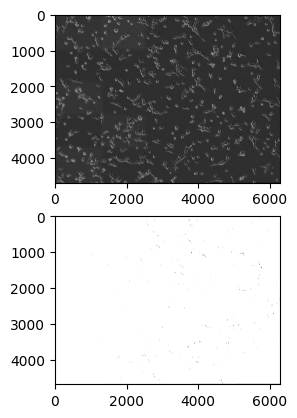

True

In [9]:
#Equalization (To adjust the balance of the frequency components in an image)
#cumsum: cumulative distribution function
cdf = hist.cumsum() / hist.sum()
cdf.shape

im_equalized = cdf[unlabeled_image] * 255

#fig, axes = plt.subplots(2,1)
#plot the histogram
#axes[0].imshow(unlabeled_image)
#axes[1].imshow(im_equalized)
#plt.show()

# Save the processed image
cv2.imwrite("/content/gdrive/My Drive/Google Colab Folder/TNT_Project/output_image_equalized.png", im_equalized)

In [10]:
#Add mask
mask1 = unlabeled_image < 50

In [15]:
im_cells = np.where (unlabeled_image > 50,unlabeled_image,0)
cv2.imwrite("/content/gdrive/My Drive/Google Colab Folder/TNT_Project/output_image_masked.png", im_cells)

True

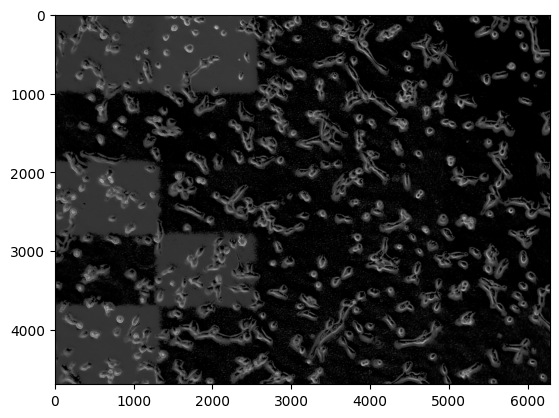

In [16]:
plt.imshow(im_cells,cmap ='gray')

In [17]:
#Apply Filters

In [13]:
#Dialation: dilation expands the white regions, making them larger, and it leaves the black regions unchanged.

In [18]:
import cv2
import numpy as np

def dilation(image, kernel_size):
    # Create a kernel for dilation (structuring element)
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    # Perform dilation on the input image
    dilated_image = cv2.dilate(image, kernel, iterations=1)

    return dilated_image


if __name__ == "__main__":
    # Load your input image
    input_image = cv2.imread("/content/gdrive/My Drive/Google Colab Folder/TNT_Project/m05.png", cv2.IMREAD_GRAYSCALE)

    # Set the kernel size for dilation
    kernel_size = 3

    # Perform dilation
    output_image = dilation(input_image, kernel_size)

    # Save the processed image
    cv2.imwrite("/content/gdrive/My Drive/Google Colab Folder/TNT_Project/output_image_dilated.png", output_image)


In [ ]:
#Rolling Ball Algorithm : to remove uneven backgrounds or smooth the intensity variations in an image
# where the image may have uneven lighting or background artifacts

In [24]:
import cv2
import numpy as np

def background_and_shading_correction(image, ball_radius):
    # Convert the image to grayscale, rolling ball algorithm is usually applied to grayscale images.
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the rolling ball algorithm for background correction
    #The kernel_size is set to be twice the ball_radius plus one.
    #The "+1" ensures that the kernel has an odd size, which is a requirement for morphological operations.
    kernel_size = ball_radius * 2 + 1
    background_corrected = cv2.morphologyEx(gray_image, cv2.MORPH_TOPHAT, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size)))

    # Perform shading correction by subtracting the background corrected image from the original image
    shading_corrected = cv2.subtract(gray_image, background_corrected)

    # Convert the shading corrected image back to color (optional)
    shading_corrected_color = cv2.cvtColor(shading_corrected, cv2.COLOR_GRAY2BGR)

    # Combine the shading-corrected image with the original image to get the final result
    result_image = cv2.addWeighted(image, 1, shading_corrected_color, 0.7, 0)

    return result_image

# Load your input image
input_image = cv2.imread("/content/gdrive/My Drive/Google Colab Folder/TNT_Project/m05.png")

# Set the radius for the rolling ball algorithm (adjust as needed)
ball_radius = 50

# Perform background and shading correction
output_image = background_and_shading_correction(input_image, ball_radius)

# Save the processed image (replace "output_image.jpg" with the desired output path)
cv2.imwrite("/content/gdrive/My Drive/Google Colab Folder/TNT_Project/output_image_rolling_ball_50.png", output_image)



True

In [30]:
import cv2

def background_and_shading_correction(image, sigma):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the Gaussian filter for background correction
    background_corrected = cv2.GaussianBlur(gray_image, (0, 0), sigmaX=sigma, sigmaY=sigma)

    # Perform shading correction by subtracting the background corrected image from the original image
    shading_corrected = cv2.subtract(gray_image, background_corrected)

    # Convert the shading corrected image back to color (optional)
    shading_corrected_color = cv2.cvtColor(shading_corrected, cv2.COLOR_GRAY2BGR)

    # Combine the shading-corrected image with the original image to get the final result
    result_image = cv2.addWeighted(image, 1, shading_corrected_color, 0.7, 0)

    return result_image

# Example usage:
if __name__ == "__main__":
    # Load your input image (replace "your_image_path.jpg" with the actual image path)
    input_image = cv2.imread("/content/gdrive/My Drive/Google Colab Folder/TNT_Project/m05.png")

    # Set the sigma value for the Gaussian filter (adjust as needed)
    sigma = 3

    # Perform background and shading correction
    output_image = background_and_shading_correction(input_image, sigma)

    # Save the processed image (replace "output_image.jpg" with the desired output path)
    cv2.imwrite("/content/gdrive/My Drive/Google Colab Folder/TNT_Project/output_image_gaussian.png", output_image)
